# [**Vehicle CO2 Emission**](https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data "Kaggle: Vehicle CO2 Emissions")

## **About Dataset**

This dataset contains information on vehicle specifications, fuel consumption, and CO2 emissions, collected to analyze the environmental impact of vehicles and predict their CO2 emissions using regression models. The dataset is structured to support both **Simple Linear Regression (SLR)** and **Multiple Linear Regression (MLR)** approaches for machine learning projects.

#### **Key Features**

* **Make** - The manufacturer or brand of the vehicle (e.g., Toyota, Ford, BMW, etc.).
* **Model** - The specific model of the vehicle, indicating its design and version.
* **Vehicle Class** - Classification of vehicles based on size and intended usage (e.g., Compact, SUV, Sedan, etc.).
* **Engine Size (Liters)** - The displacement volume of the engine, measured in liters (L).
* **Cylinders** - The number of cylinders in the engine, which affects engine performance and efficiency. 
* **Transmission** - The type of transmission system in the vehicle, which determines how the engine power is delivered to the wheels.
* **Fuel Type** - The type of fuel used by the vehicle. Different fuel types affects efficiency, cost, and emissions.
* **Fuel Consumption City (L/100 km)** - The fuel consumption of the vehicle in city driving conditions, measured in liters per 100 kilometers (L/100 km).
* **Fuel Consumption Hwy (L/100 km)** - The fuel consumption of the vehicle on highways, measured in liters per 100 kilometers (L/100 km).
* **Fuel Consumption Combined (L/100 km)** - Combined fuel consumption (L/100 km).
* **Target: CO2 Emission (g/km)** - CO2 emissions in grams per kilometer.

## **Import Required Libraries & Setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import prettytable
import csv

prettytable.DEFAULT = 'DEFAULT'

In [3]:
# Set up database connection
con = sqlite3.connect('vehicle_co2_emission_data.db')
cur = con.cursor()

In [4]:
%load_ext sql

%sql sqlite:///vehicle_co2_emission_data.db

In [5]:
df = pd.read_csv('co2.csv')
df.to_sql('vehicle_co2_emission_TBL', con, if_exists='replace', index=False)

7385

In [6]:
# Drop the table if it exists
%sql DROP TABLE IF EXISTS vehicle_co2_emission_table;

 * sqlite:///vehicle_co2_emission_data.db
Done.


[]

In [7]:
%sql CREATE TABLE vehicle_co2_emission_table AS SELECT * FROM vehicle_co2_emission_TBL;

 * sqlite:///vehicle_co2_emission_data.db
Done.


[]

## **Queries in SQL**

1. Which vehicle make has the highest average C02 emissions?

In [8]:
%%sql

SELECT "Make",
    AVG("CO2 Emissions(g/km)") as avg_co2
FROM vehicle_co2_emission_table
GROUP BY "Make"
ORDER BY avg_co2 DESC
LIMIT 1;

 * sqlite:///vehicle_co2_emission_data.db
Done.


Make,avg_co2
BUGATTI,522.0


2. What are the top 5 most fuel-efficient vehicle models (lowest combined fuel consumption)?

In [9]:
%%sql

SELECT "Make",
    "Model",
    "Fuel Consumption Comb (L/100 km)" as fuel_comb
FROM vehicle_co2_emission_table
ORDER BY fuel_comb ASC
LIMIT 5;

 * sqlite:///vehicle_co2_emission_data.db
Done.


Make,Model,fuel_comb
HYUNDAI,IONIQ BLUE,4.1
HYUNDAI,IONIQ BLUE,4.1
HYUNDAI,IONIQ Blue,4.1
HYUNDAI,IONIQ Blue,4.1
HYUNDAI,IONIQ,4.2


3. How do average CO2 emissions differ by fuel type?

In [10]:
%%sql

SELECT "Fuel Type",
    AVG("CO2 Emissions(g/km)") AS avg_co2
FROM vehicle_co2_emission_table
GROUP BY "Fuel Type"
ORDER BY avg_co2 ASC;

 * sqlite:///vehicle_co2_emission_data.db
Done.


Fuel Type,avg_co2
N,213.0
X,235.11932911740445
D,237.54857142857142
Z,266.0434103685197
E,275.0918918918919


4. What is the average CO2 emission for each vehicle class?

In [11]:
%%sql

SELECT "Vehicle Class",
    AVG("CO2 Emissions(g/km)") AS avg_co2
FROM vehicle_co2_emission_table
GROUP BY "Vehicle Class"
ORDER BY avg_co2 DESC;

 * sqlite:///vehicle_co2_emission_data.db
Done.


Vehicle Class,avg_co2
VAN - PASSENGER,397.2121212121212
VAN - CARGO,361.5
SUV - STANDARD,304.83673469387753
PICKUP TRUCK - STANDARD,301.51301115241637
PICKUP TRUCK - SMALL,278.9685534591195
TWO-SEATER,277.454347826087
FULL-SIZE,263.31611893583727
MINIVAN,262.3125
SUBCOMPACT,246.44884488448844
STATION WAGON - MID-SIZE,238.69811320754718


5. Which transmission type is associated with the lowest average CO2 emissions?

In [12]:
%%sql

SELECT "Transmission",
    AVG("CO2 Emissions(g/km)") AS avg_co2
FROM vehicle_co2_emission_table
GROUP BY "Transmission"
ORDER BY avg_co2 ASC
LIMIT 1;

 * sqlite:///vehicle_co2_emission_data.db
Done.


Transmission,avg_co2
AM5,148.5


6. What is the trend between engine size and CO2 emissions?

In [13]:
%%sql

SELECT ROUND("Engine Size (L)", 1) AS engine_size,
    AVG("CO2 Emissions(g/km)") AS avg_co2
FROM vehicle_co2_emission_table
GROUP BY engine_size
ORDER BY engine_size ASC;

 * sqlite:///vehicle_co2_emission_data.db
Done.


engine_size,avg_co2
0.0,250.58469871360867


7. Which manufacturers offer hybrid vehicles, and what are their average CO2 emissions?

In [14]:
%%sql

SELECT "Make",
    COUNT(*) AS hybrid_count, 
    AVG("CO2 Emissions(g/km)") AS avg_co2
FROM vehicle_co2_emission_table
WHERE "Model" LIKE "%HYBRID%"
GROUP BY "Make"
ORDER BY avg_co2 ASC;

 * sqlite:///vehicle_co2_emission_data.db
Done.


Make,hybrid_count,avg_co2
HONDA,7,115.85714285714286
CHEVROLET,4,121.25
VOLKSWAGEN,3,123.33333333333333
HYUNDAI,13,136.76923076923077
LINCOLN,7,137.42857142857142
FORD,15,139.86666666666667
KIA,10,140.8
TOYOTA,31,152.80645161290323
SUBARU,3,175.0
ACURA,12,187.58333333333334


## **Exploratory Data Analysis**

#### **Data Overview**

In [15]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [19]:
df.shape

(7385, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [18]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [22]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [20]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### **Univariate Analysis**

#### **a.  CO₂ Emissions Distribution**

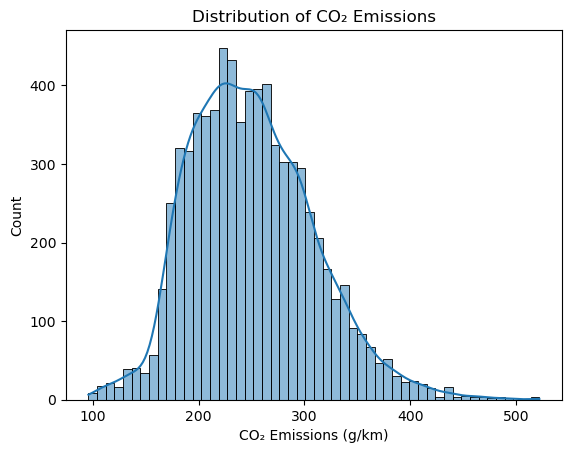

In [23]:
sns.histplot(df['CO2 Emissions(g/km)'], kde=True)
plt.title('Distribution of CO₂ Emissions')
plt.xlabel('CO₂ Emissions (g/km)')
plt.show()

Distribution may be right-skewed (more low-emissions vehicles, fewer high-emissions).

#### **b. Engine Size Distribution**

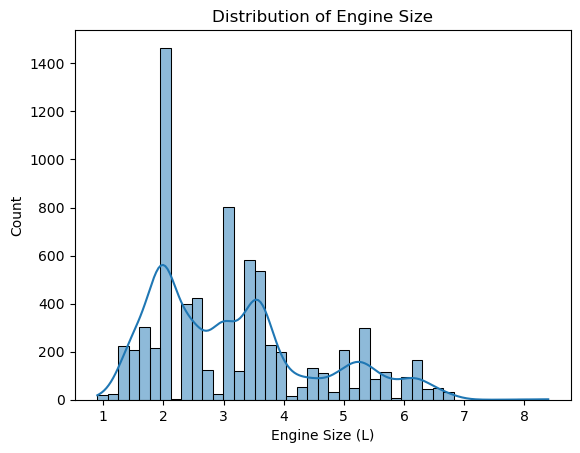

In [24]:
sns.histplot(df['Engine Size(L)'], kde=True)
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size (L)')
plt.show()

Most engines are between at least 1 liters and 4 liters. The outliers may indicate sports or luxury vehicles.

### **Categorical Analysis**

#### **a. Vehicle Class Counts**

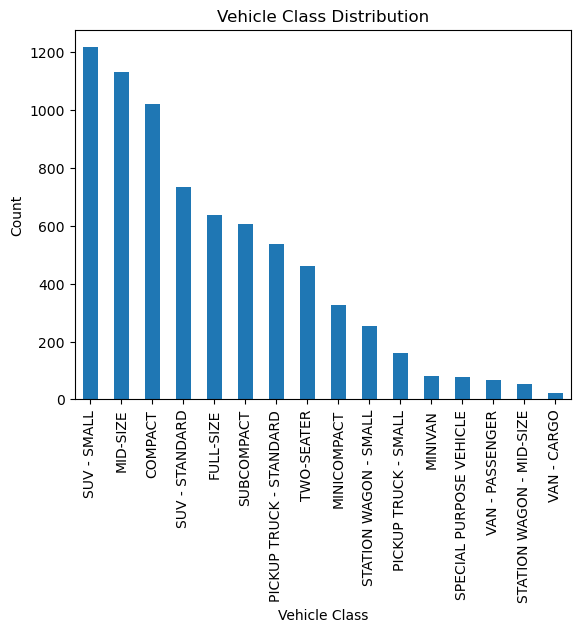

In [25]:
df['Vehicle Class'].value_counts().plot(kind='bar')
plt.title('Vehicle Class Distribution')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.show()

Most common classes (e.g., SUV - Small, Mid-Size, Compact). Rare classes may be luxury or specialty vehicles.

#### **b. Fuel Type Counts**

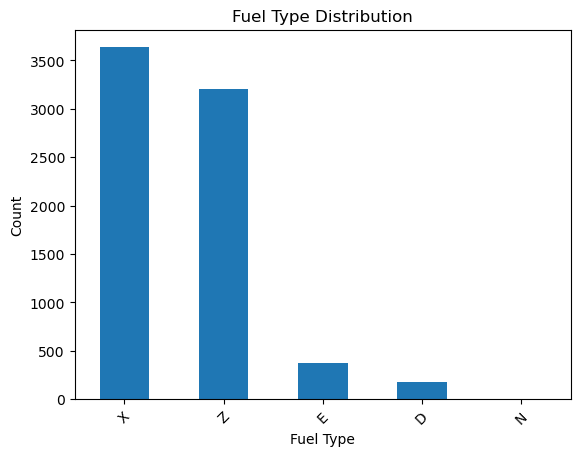

In [29]:
df['Fuel Type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Dominant fuel types (e.g., Gasoline, Diesel). Presence of hybrids or alternative fuels.

### **Bivariate Analysis**

#### **a. Engine Size vs CO₂ Emissions**

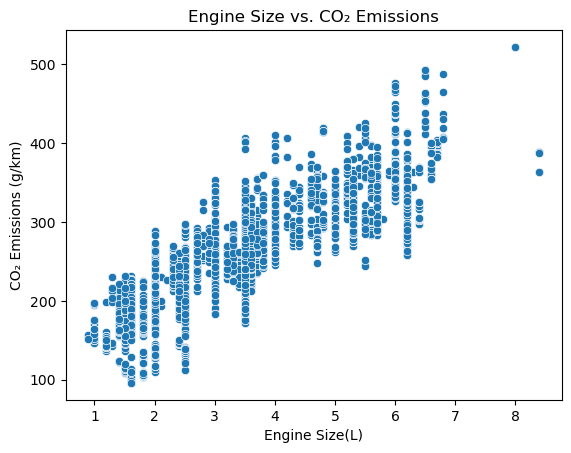

In [30]:
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.title('Engine Size vs. CO₂ Emissions')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO₂ Emissions (g/km)')
plt.show()

Positive correlation: larger engines tend to emit more CO₂. Some small engines may have high emissions (possibly due to older tech or performance tuning).

#### **b. Fuel Consumption vs. CO₂ Emissions**

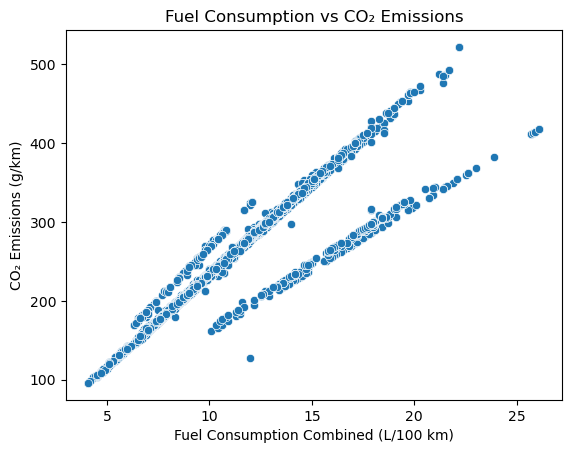

In [31]:
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=df)
plt.title('Fuel Consumption vs CO₂ Emissions')
plt.xlabel('Fuel Consumption Combined (L/100 km)')
plt.ylabel('CO₂ Emissions (g/km)')
plt.show()

Strong positive correlation: higher fuel consumption leads to higher CO₂ emissions.

#### **c. CO₂ Emissions by Vehicle Class**

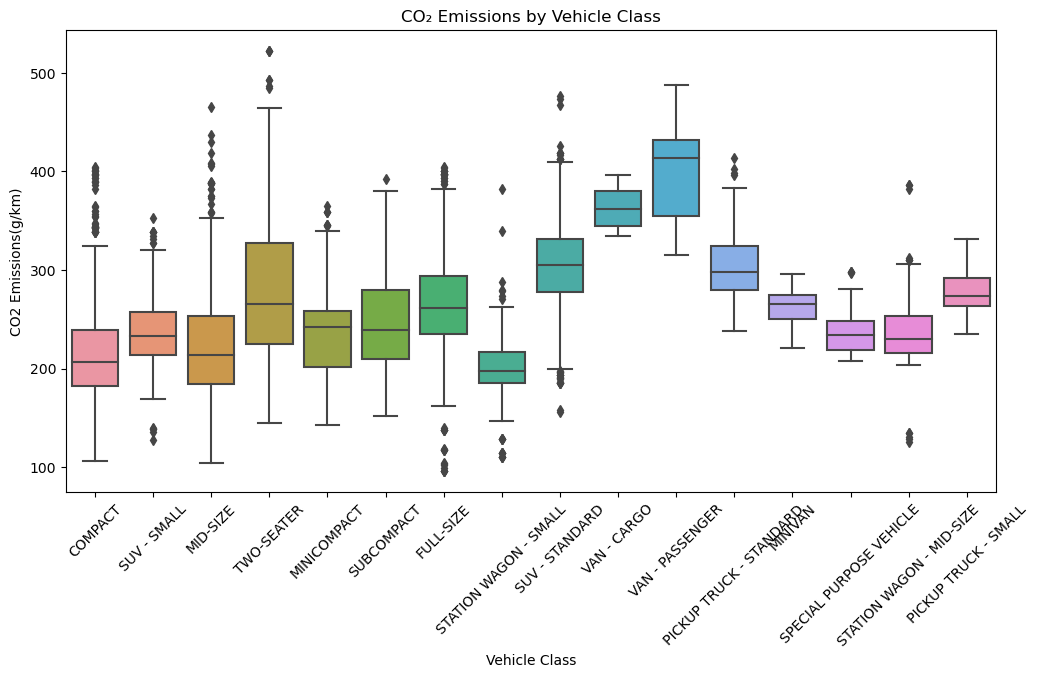

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation=45)
plt.title('CO₂ Emissions by Vehicle Class')
plt.show()

SUVs and larger vehicles generally have higher median CO₂ emissions. Compact and subcompact vehicles have lower emissions.

### **Group Analysis**

#### **a. Average CO₂ Emissions by Make**

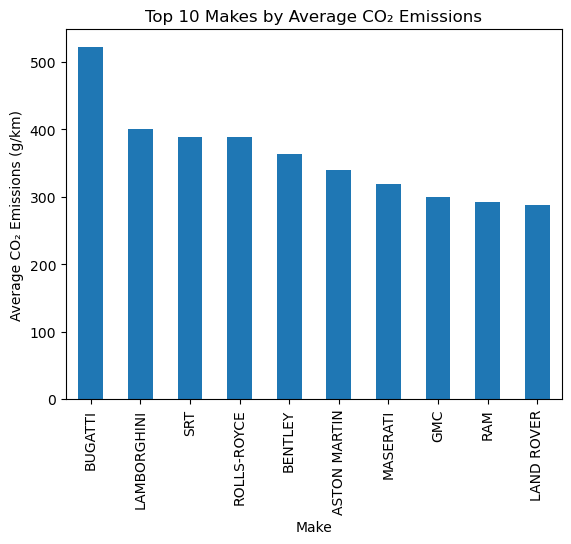

In [35]:
make_avg = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)
make_avg.head(10).plot(kind='bar')
plt.title('Top 10 Makes by Average CO₂ Emissions')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.show()

Brands with performance or luxury focus may have higher averages.

#### **b. Average CO₂ Emissions by Fuel Type**

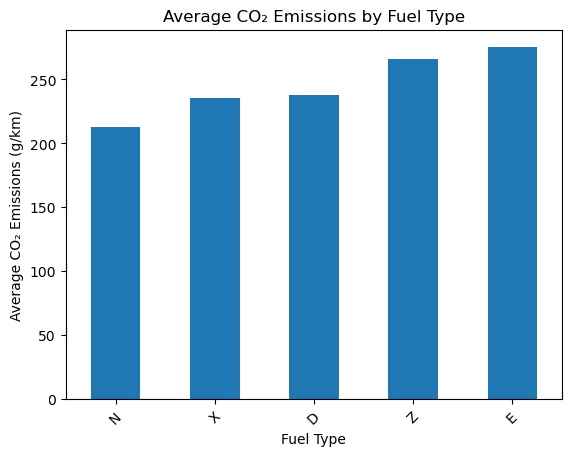

In [37]:
fuel_avg = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values()
fuel_avg.plot(kind='bar')
plt.title('Average CO₂ Emissions by Fuel Type')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

Hybrids and alternative fuels (if present) have lower emissions. Diesel and gasoline compared. 

### **Correlation Matrix**

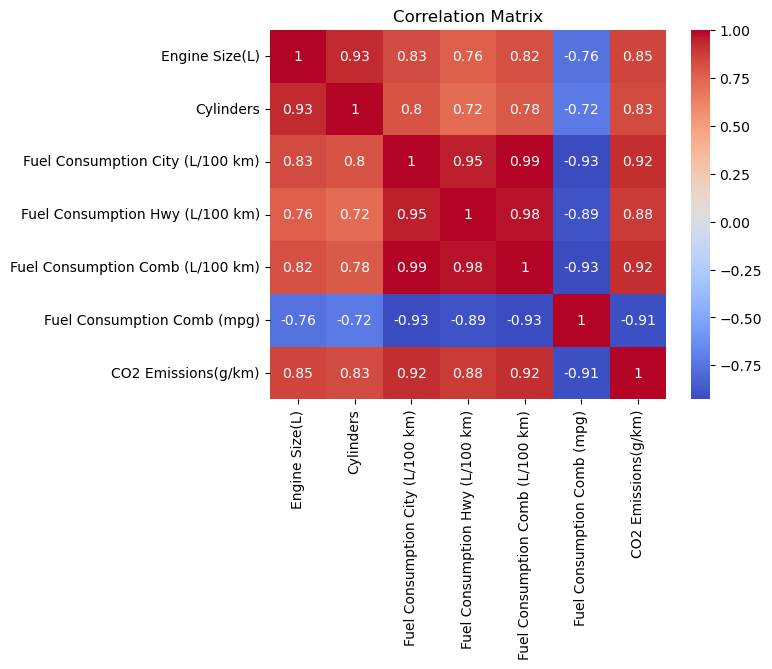

In [42]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Strong correlations between engine size, cylinders, fuel consumption, and CO₂ emissions.

#### <u>**Summary of Key Insights**</u>

* **CO₂ emissions** are strongly correlated with engine size and fuel consumption.
* **Vehicle class** and **fuel type** significantly affect emissions: larger vehicles and traditional fuels emit more.
* **Most vehicles** are compact or small SUVs, with gasoline as the dominant fuel.
* **Outliers** (very high emissions) are often luxury or performance vehicles.